### Building a Linear Regression Model
- The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

## Attribute Information

### Input features in order:

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

### Output variable:

1) MEDV: Median value of owner-occupied homes in $1000's [k$]



In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [92]:
boston = pd.read_csv(r"C:\Users\Samoei\Desktop\Data Science Project\boston.csv")

In [93]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Descriptive Analysis

In [94]:
boston.describe()## General descriptive analysis 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- The mean of the median value of owner-occupied homes in boston is 22.53
- The average number of rooms per home is 6 rooms.
- Most of the dwellings in boston area are older. The mean age is 68 years and the 75% percentile is 94 years. 
- The crime rate in the area has a high variability with th lowest rate at 0.006 and the largest at 88.97

In [95]:
boston.isna().sum() # Checking for missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- There are no missing values in the data set

In [96]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


- There are no categorical data in our data set

## Regression Equation 

- y = mx + c (simple linear regression)
- y is the dependent vvariable
- x is the independent vvariable. X can take more than 1 variable,i.e, there can be 2, 3 or 10 independent variables/predictors
- m is the slope of the line
- c is the constant
- y = m1x1 + m2x2 + m3x2 + c(multiple linear regression)

In [97]:
X.shape, y.shape

((506, 11), (506,))

# Data Processing 

## Univariate Analysis

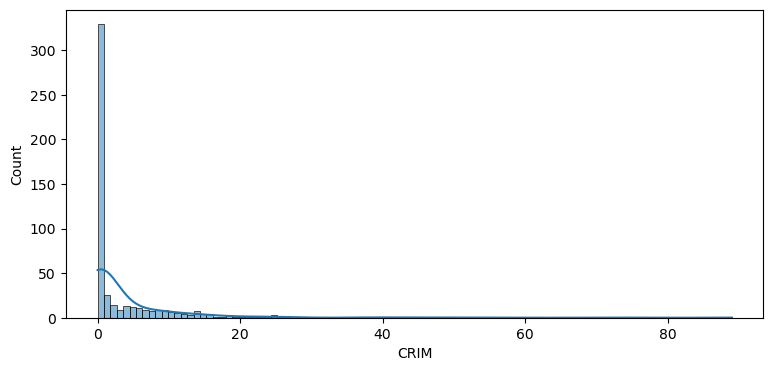

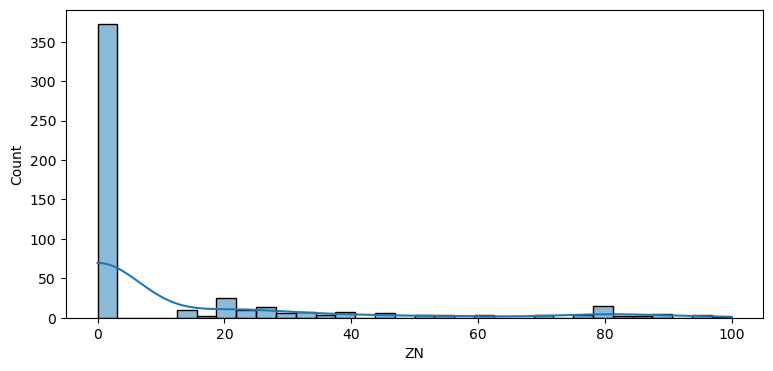

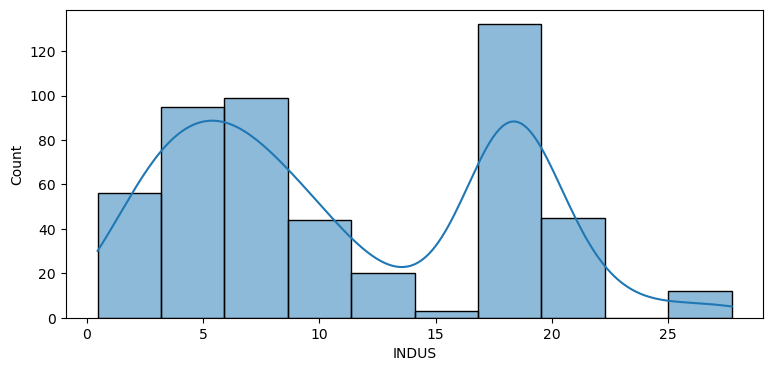

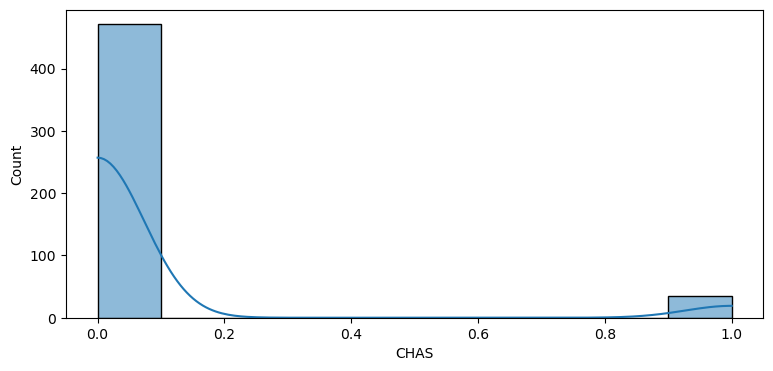

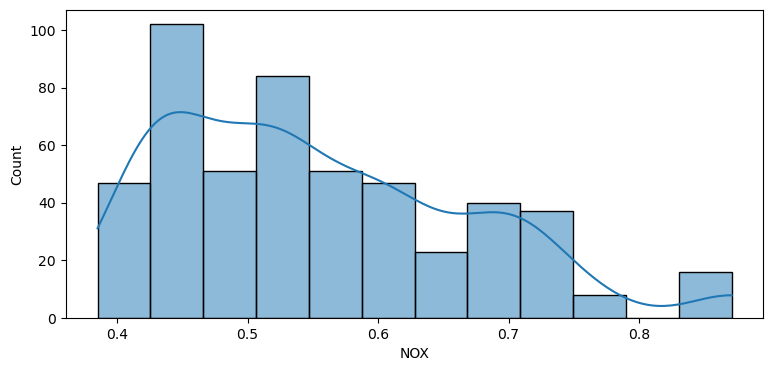

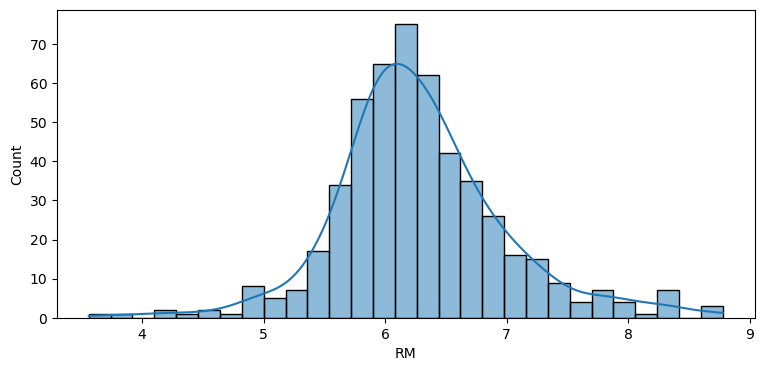

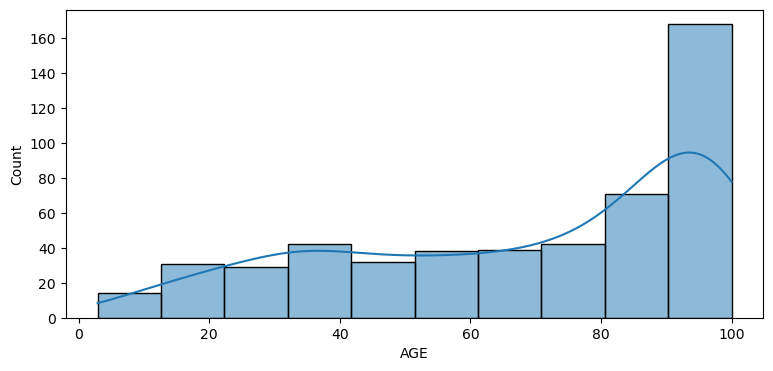

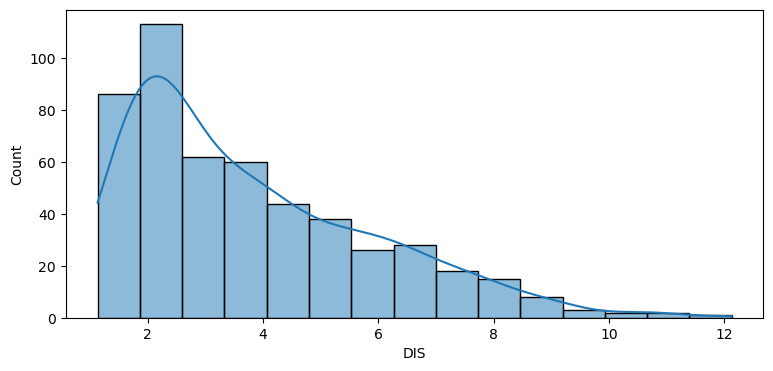

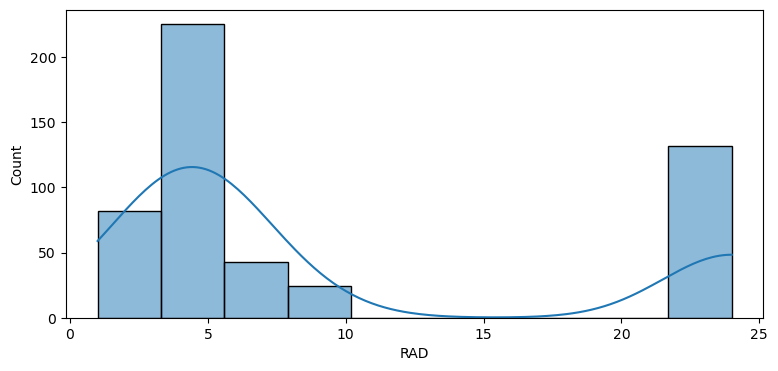

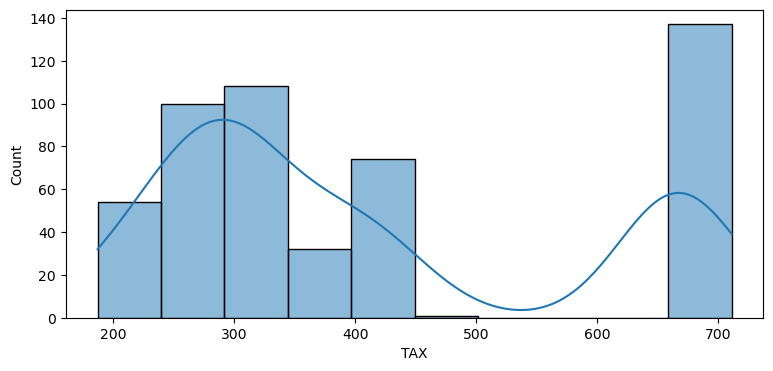

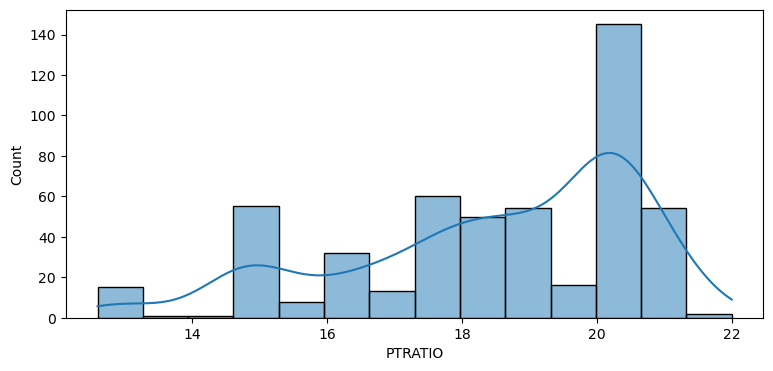

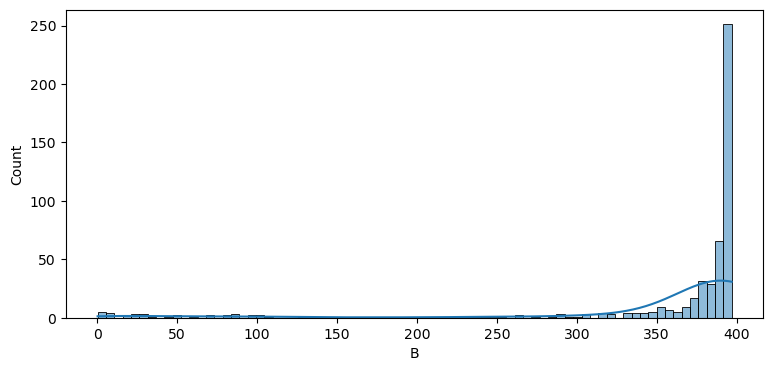

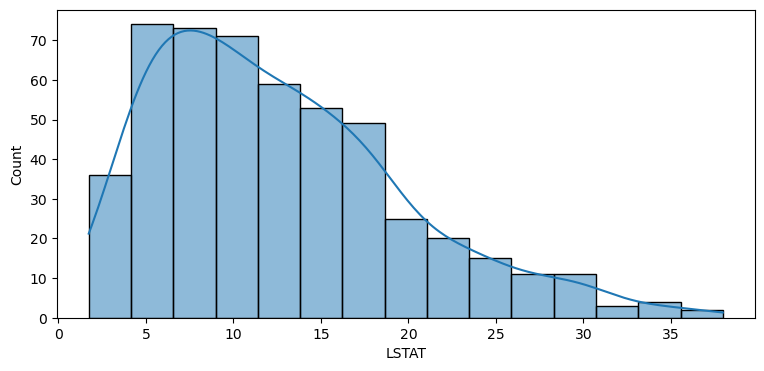

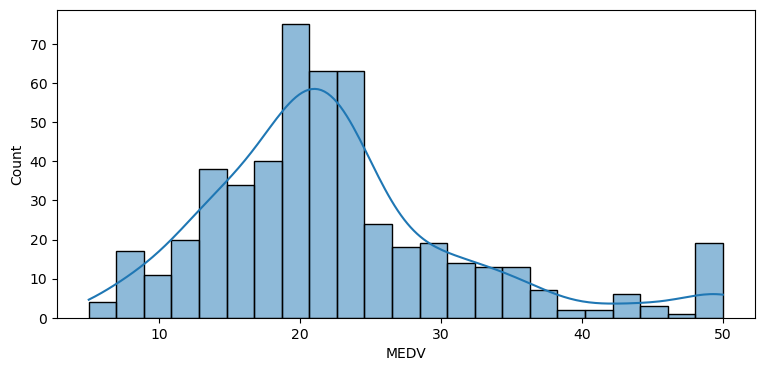

In [98]:
for i in boston.columns:
    plt.figure(figsize=(9,4))
    sns.histplot(data=boston,x=i,kde=True)
    plt.show()

- Crime rate (CRIM) is skewed to the right (positive skew). However, the long tail shows presence of an outlier
- The CHAS variable follows a binomial distribution (with only two unique values). The graph shows that most of the residents live away from Charles river (value 0).
- The distribution of DIS shows that most of the residences are closer to Boston employment centres.
- RM (average room per dwelling) as a bell shaped showing normal distribution. This means most of the houses have the same numbe rof rooms. 
- MEDV distribution is slightly skewed to the right. 

In [99]:
## Tranforming our taregt variable using log
boston['MEDV_NEW']= np.log(boston['MEDV'])

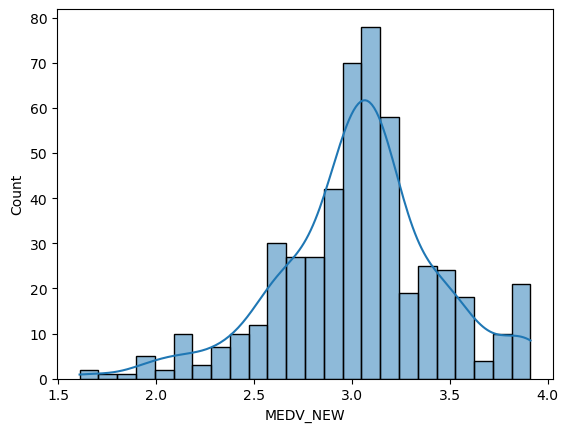

In [100]:
sns.histplot(data=boston,x="MEDV_NEW", kde= True);

- The transformed MEDV distribution is slightly normally distributed and thus we can use these values.

Text(0.5, 0, 'PTRATIO')

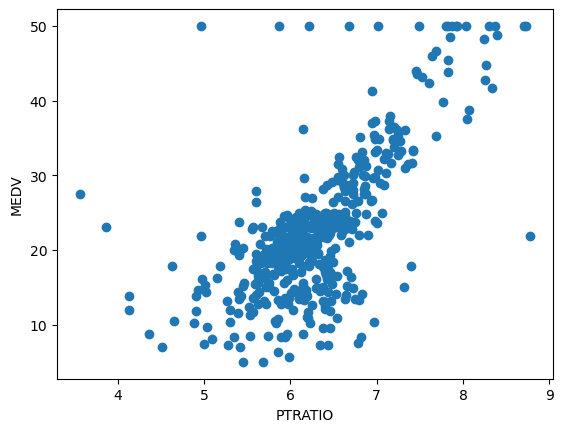

In [101]:
plt.scatter(data = boston,x="RM",y="MEDV")
plt.ylabel("MEDV")
plt.xlabel("PTRATIO")

## Correlation between Variables 

<AxesSubplot:>

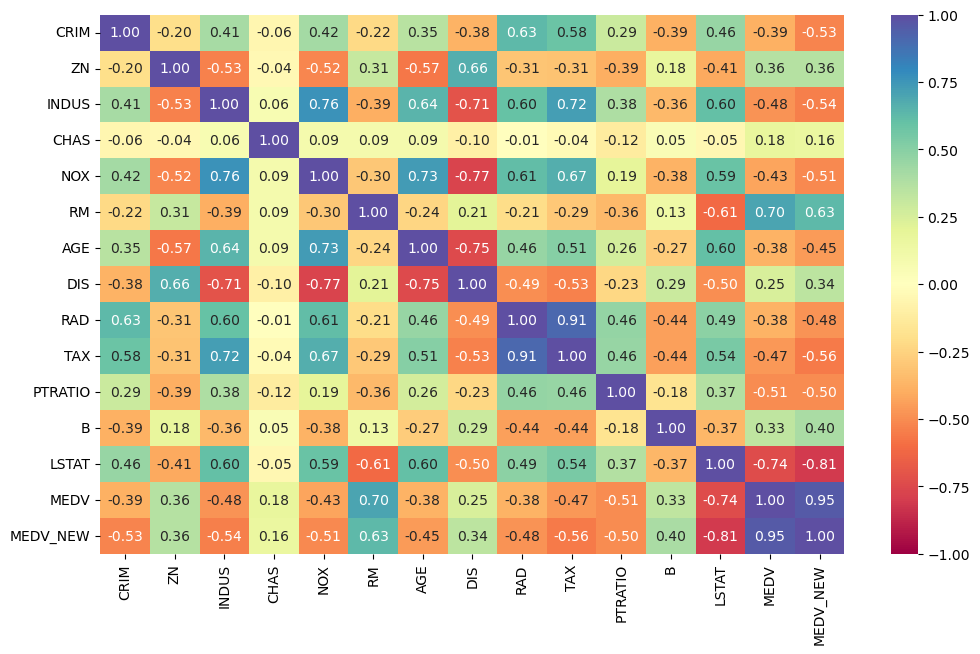

In [102]:
plt.figure(figsize=(12,7))
sns.heatmap(boston.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # checking the correlation between variables 

- RM (average number of rooms per dwelling) has the highest positive correlation (0.70) to MEDV 
- LSTAT(% lower status of the population) has the highest negative correlation (-0.74) to MEDV
- There is a significant correlation (0.76) between NOX and INDUS. 
- DIS and NOX have a significant negative correlation. 
- Age and DIS have a significant negative corrlation.

Text(0.5, 0, 'LSTAT')

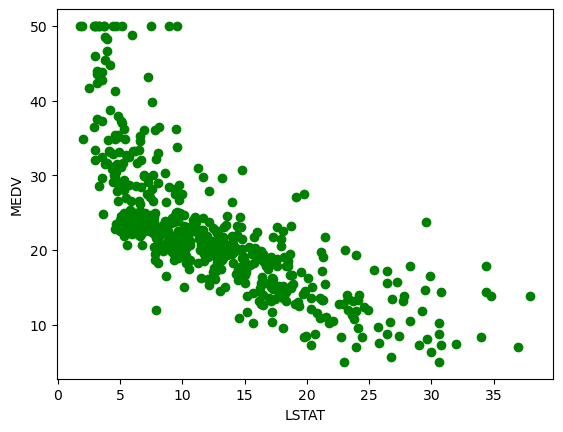

In [103]:
plt.scatter(data = boston,x="LSTAT",y="MEDV",color="g")
plt.ylabel("MEDV")
plt.xlabel("LSTAT")

- This is a negative correlation. An increase in % lower status of the population is followed by a decrease in median value of owner-occupied homes. This is appearss to be the case becuase it is normal to find lower value houses in areas with lower status population.  

Text(0.5, 0, 'RM')

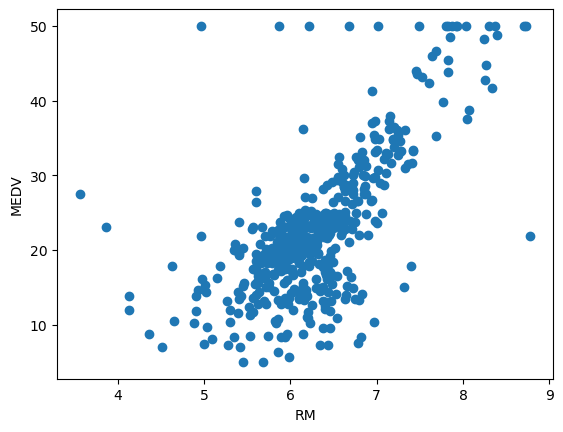

In [104]:
plt.scatter(data = boston,x="RM",y="MEDV")
plt.ylabel("MEDV")
plt.xlabel("RM")

- Dwellings with approximately 22 MEDV contains 6 rooms as observed in the plot above.
- Also, the price of the house appears to increase with increase in the number of rooms.

Text(0.5, 0, 'AGE')

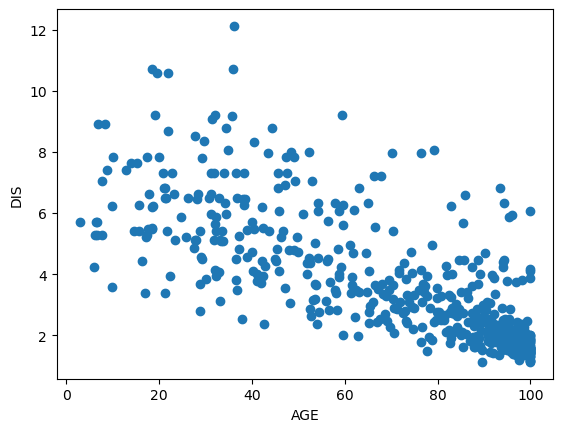

In [105]:
plt.scatter(data = boston,x="AGE",y="DIS")
plt.ylabel("DIS")
plt.xlabel("AGE")

- As the weighted distance to Boston employment centres decreases, the age of the dwellings increases. This might indicate that most boston employment centres are build in the area where older houses are located. 

## Building the model

In [106]:
## Extracting the dependent and independent data and adding a constant to the intercept term
from statsmodels.formula.api import ols
import statsmodels.api as sm
X = boston.drop(['MEDV_NEW',"MEDV"],axis=1) # dependent variable
y = boston["MEDV_NEW"] # indepedent variable
X = sm.add_constant(X)

In [107]:
# splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1)

In [108]:
X_train.shape, X_test.shape

((354, 14), (152, 14))

### Checking for Multicollinearity 

- We use Variance Inflaction Factor to check for variability in the data. VIF is used to measure the extent at which the behaviour of the indepedent variable is influenced.
- VIF also measures how much a variable is contributing to the standard error in regression.
- VIF values of 4-5 are regarded as moderately high while those with 10 and above are regarded as very high.
- For our case, we will drop variables with VIF values exceeding 10.

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Creating a function that checks VIF 
def check_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculate VIF
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif
print(check_vif(X_train))

    feature         VIF
0     const  585.099960
1      CRIM    1.993439
2        ZN    2.743911
3     INDUS    4.004462
4      CHAS    1.078490
5       NOX    4.430555
6        RM    1.879494
7       AGE    3.155351
8       DIS    4.361514
9       RAD    8.369185
10      TAX   10.194047
11  PTRATIO    1.948555
12        B    1.385213
13    LSTAT    2.926462


In [110]:
#Lets drop TAX with VIF value 10
X_train = X_train.drop(columns={"TAX"})

print(check_vif(X_train))

    feature         VIF
0     const  581.372515
1      CRIM    1.992236
2        ZN    2.483521
3     INDUS    3.277778
4      CHAS    1.052841
5       NOX    4.397232
6        RM    1.876243
7       AGE    3.154114
8       DIS    4.339453
9       RAD    2.978247
10  PTRATIO    1.914523
11        B    1.384927
12    LSTAT    2.924524


- All the independent values have a VIF value less than 5 and thus we can assume that the multicollinearity has been removed. We can go ahead and build the model with these variables 

## OLS model

In [111]:
##Using the statsmodel
mod = sm.OLS(y_train, X_train).fit()
#Checkinf mod summary
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_NEW   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     95.56
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          2.97e-101
Time:                        15:01:42   Log-Likelihood:                 78.262
No. Observations:                 354   AIC:                            -130.5
Df Residuals:                     341   BIC:                            -80.22
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4999      0.253     17.767      0.000       4.002       4.998
CRIM          -0.0122      0.002     -7.005      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.417      0.157      -0.000       0.002
INDUS         -0.0002      0.003     -0.066      0.947      -0.006       0.005
CHAS           0.1164      0.039      3.008      0.003       0.040       0.193
NOX           -1.0297      0.187     -5.509      0.000      -1.397      -0.662
RM             0.0569      0.021      2.734      0.007       0.016       0.098
AGE            0.0003      0.001      0.390      0.697      -0.001       0.002
DIS           -0.0496      0.010     -4.841      0.000      -0.070      -0.029
RAD            0.0080      0.002      3.885      0.000       0.004       0.012
PTRATIO       -0.0458      0.007     -6.762      0.000      -0.059      -0.033
B              0.0002      0.000      1.796      0.073   -2.35e-05       0.001
LSTAT         -0.0291      0.002    -11.772      0.000      -0.034      -0.024
==============================================================================
Omnibus:                       33.707   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.726
Skew:                           0.387   Prob(JB):                     1.34e-22
Kurtosis:                       5.496   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The model has a R-squared value of 0.771. This means that 77.1% of the variability in the MEDV_NEW(target variable) can be explained by the regression model.
- The adjusted R-squared is 0.763.This value only takes into account model predictors that adds value or improves the model.


### Significance of the model

- ZN, INDUS, AGE and B are not significant at 5% significal level. This is because their p-values are greater than 0.05. All the other independent variables are significant at 5% level of significance. 

- We will drop non-significant variables and build another model.

In [113]:
#Building a new model with the remaining variables
X = boston.drop(columns={"MEDV","MEDV_NEW","TAX",'ZN','INDUS','AGE','B'})
y = boston['MEDV_NEW']
X = sm.add_constant(X)

#Splitting data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Creating the model
mod1= sm.OLS(y_train,X_train).fit()

#Checking for model 1 summary
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_NEW   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          2.61e-104
Time:                        15:06:53   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The R-squared value has reduced to 0.767 becuase we have dropped some variables. 
- Adjusted R-squared only dropped by a small percentage because it uses only important variables from the dataframe.
- All variables are now statistially significant at 5% level of significance.

### Checking for mean residuals 

In [115]:
residuals = mod1.resid
residuals.mean()

-1.549921521948453e-15

- The mean residuals of the model is close to zero. Therefore, the assumption for mean residuals is satisfied. 

### Checking for homoscedasticity

- Homoscedasticity is the assumption that all residuals have equal variances.
- Uneven variances lead to skewed test results.
- The data is said to be homoscedastic if the residuals are symmetrically distributed and heteroscedastic if they are asymmetric. 
- We will use Goldfeldquandt Test to test for the hypothesis that the residuals are homoscedastic against the alternative hypothesis that the residuals have heteroscedastic.

In [116]:
#Importing the libraries
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Checking for homoscedasticity using F value and P value
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0835082923425279), ('p-value', 0.3019012006766915)]

- The p-value is 0.302 which is greater than 0.05 thus it is not statistically significant. We fail to reject the null hypotheis and conclude that the residuals are homoscedastic (assumption satisfied).

### Checking for Linearity of variables

- This assumption states that the predictor variables have a linear relation with the target variable(s).
- We will use fitted values and residuals to check for this assumption. 

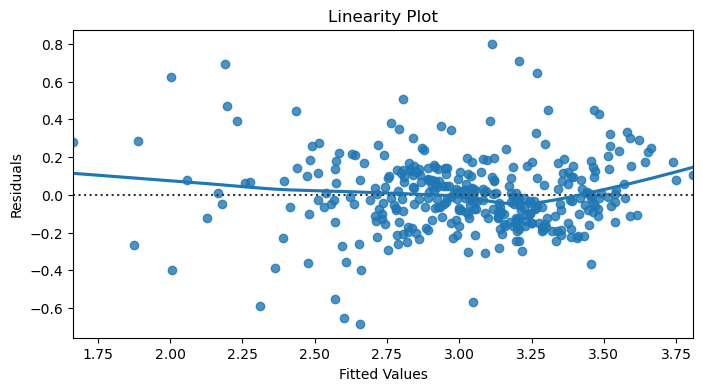

In [122]:
# Predicted values
fitted_v = mod1.fittedvalues

#ploting the residplot
plt.figure(figsize=(8,4))
sns.residplot(x = fitted_v, y = residuals, lowess = True)
plt.title("Linearity Plot")
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

- It appears that there is no clear patterns in the distribution of the data. The points are randomly distributed along the x-axis and thus the assumption of linearity is satisfied.

### Checking for normality of errors

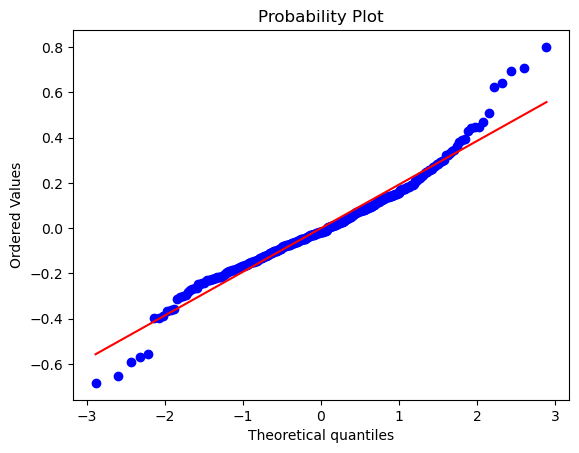

In [121]:
# We will use both a q-q plot and a histogram

#Probability plot
import pylab
import scipy.stats as stats

stats.probplot(residuals,dist="norm", plot=pylab)
plt.show()

<AxesSubplot:ylabel='Count'>

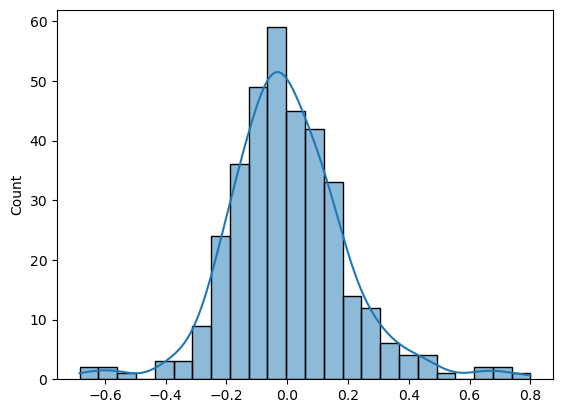

In [123]:
##histogram
sns.histplot(residuals,kde=True)

- From the above two plots, we can observe that the residuals depicts a normal distribution. Therefore, the assumptions for normality of errors is satisfied. 

### Using different metrics to check for performance of the model

In [131]:
# We will use RMSE,MAE,and MAPE to check for the performance
#Defining functions for the metrics

def rmse(predictions,targets):
    return np.sqrt(((targets-predictions)**2).mean())

def mae(predictions,targets):
    return np.mean(np.abs((targets-predictions)))
def mape(predictions,targets):
    return np.mean(np.abs((targets-predictions)) / targets)*100

def model_pref(olsmodel, x_train, x_test):

   # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test
    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )
          

# Checking model performance
model_pref(mod1, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


- The Root Mean Squared Error is 0.196 for the train data and 0.198 for the test data.
- The Mean Absolute Error is 0.14 for the train data and 0.15 for the test data.
- The Mean Absolute Percentage Error is 4.98 and 5.26 for train and test data respectively.

### Using cross validation metrics to improve the model

In [136]:
from sklearn.model_selection import cross_val_score

#model
lr = LinearRegression()
cv1 = cross_val_score(lr, X_train, y_train, cv=10)
cv2 = cross_val_score(lr, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error')

print("R-Squared: %0.3f (+/- %0.3f)" % (cv1.mean(), cv1.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv2.mean(), cv2.std() * 2))

R-Squared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


- The R-Squared is 0.729 as compared to training data which was 0.767. Therefore, we will use the model build on training data over the one build on cross validation.

## Model feature coefficients and Equation

In [140]:
Coeff = pd.DataFrame({"Features":mod1.params, "Coefs":np.transpose(mod1.params.values)})

Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(Coeff)):
    print('(', Coeff['Features'][i], ') * ', Coeff.index[i], '+', end = ' ')

log (Price) =	( 4.649385823266638 ) *  const + ( -0.012500455079103887 ) *  CRIM + ( 0.1197731907701965 ) *  CHAS + ( -1.0562253516683255 ) *  NOX + ( 0.058906575109279824 ) *  RM + ( -0.044068890799405055 ) *  DIS + ( 0.00784847460624381 ) *  RAD + ( -0.048503620794999 ) *  PTRATIO + ( -0.029277040479796866 ) *  LSTAT + 

In [142]:
import os
import nbformat
from nbconvert import HTMLExporter
with open('C:/Users/Samoei/Desktop/Data Science Project/Assignment2_boston.ipynb', 'r') as f:
    nb = nbformat.reads(f.read(), as_version=4)

#Create an html exporter
htmlexporter = HTMLExporter()
# htmlexporter.template_file = 'basic'

#Write the generated html to a file
with open('C:/Users/Samoei/Desktop/Data Science Project/Assignment2_boston.html', 'w') as f:
    f.write(htmlexporter.from_notebook_node)


TypeError: write() argument must be str, not method